In [144]:
from Function import cargar_dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from openpyxl import load_workbook 


In [145]:
file_path = '/Users/Usuario/Desktop/prueba_citec/data_set/OnlineRetail.xlsx'
# Cargar el dataset
df = cargar_dataset(file_path)

# Cleaned data

In [146]:
# Cambiemos 'CustomerID' a string
# Basados en las cloncluciones del  analilsis exploratorion del dataset procedo de la siguiente forma:
df['CustomerID'] = df['CustomerID'].fillna(1)
df['CustomerID'] = df['CustomerID'].astype(int)
# Primero, rellené los nan o null  con 1 donde este pasa a ser los clientes no registrados luego convertí a int para eliminar los .0 en cada número, y finalmente a string


In [147]:
# Convertir a strings
df['CustomerID'] = df['CustomerID'].astype(str)

In [148]:
#se valida la totalidad de datos nulods, Quedaron sólo en 'Description', lo que no es importante para el análisis
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [149]:
df.dtypes


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [150]:
# Eliminamos duplicados
df = df.drop_duplicates()

In [151]:
# el numero de registro encontrado en el analisis exploratorio fue de 541909 , por  lo tanto se encontraron 5268 datos duplicados 
df.shape 

(536641, 8)

In [152]:
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,None,56,2010-12-01 11:52:00,0.0,1,United Kingdom
1970,536545,21134,None,1,2010-12-01 14:32:00,0.0,1,United Kingdom
1971,536546,22145,None,1,2010-12-01 14:33:00,0.0,1,United Kingdom
1972,536547,37509,None,1,2010-12-01 14:33:00,0.0,1,United Kingdom
1987,536549,85226A,None,1,2010-12-01 14:34:00,0.0,1,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,None,-2,2011-12-07 18:26:00,0.0,1,United Kingdom
535326,581203,23406,None,15,2011-12-07 18:31:00,0.0,1,United Kingdom
535332,581209,21620,None,6,2011-12-07 18:35:00,0.0,1,United Kingdom
536981,581234,72817,None,27,2011-12-08 10:33:00,0.0,1,United Kingdom


In [153]:
# realicemos un analis desritivo entre Description & UnitPrice, buscando relacion entre estas 
df[df['Description'].isnull()]['UnitPrice'].describe()
# Basado en el núcleo del dataset y el análisis realizado hasta ahora, puedo estimar que las descripciones nulas corresponden a un posible ajuste de inventario

count    1454.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: UnitPrice, dtype: float64

In [154]:
# Veamos algunos indicadores de este dataset
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,536641.0,536641,535187,536641.000000,536641,536641.000000,536641,536641
unique,25900.0,4070,4223,NaN,NaN,NaN,4373,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,1,United Kingdom
freq,1114.0,2301,2357,NaN,NaN,NaN,135037,490300
mean,NaN,NaN,NaN,9.620029,2011-07-04 08:57:06.087421952,4.632656,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 10:52:00,1.250000,NaN,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 14:04:00,2.080000,NaN,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-18 17:05:00,4.130000,NaN,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,NaN,NaN


In [155]:
# notamos que en Quantity encontramos valores negativos , los cuales devemos revisar para evitar algun tipo de sesgo a fututo 

 # Feature engineering
 para continual con el analisis descritivo creo y modifico algunas de las varibles 

In [156]:
# Total = Precio * Cantidad
df['Total'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [157]:
# Nombre del día, mes, año
df['Dia']  = df['InvoiceDate'].dt.strftime('%A')
df['MesN'] = df['InvoiceDate'].dt.month
df['Mes']  = df['InvoiceDate'].dt.month_name()
df['Año']  = df['InvoiceDate'].dt.year
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Dia,MesN,Mes,Año
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Wednesday,12,December,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,12,December,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Wednesday,12,December,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,12,December,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,12,December,2010


# visualization descriptive analysis

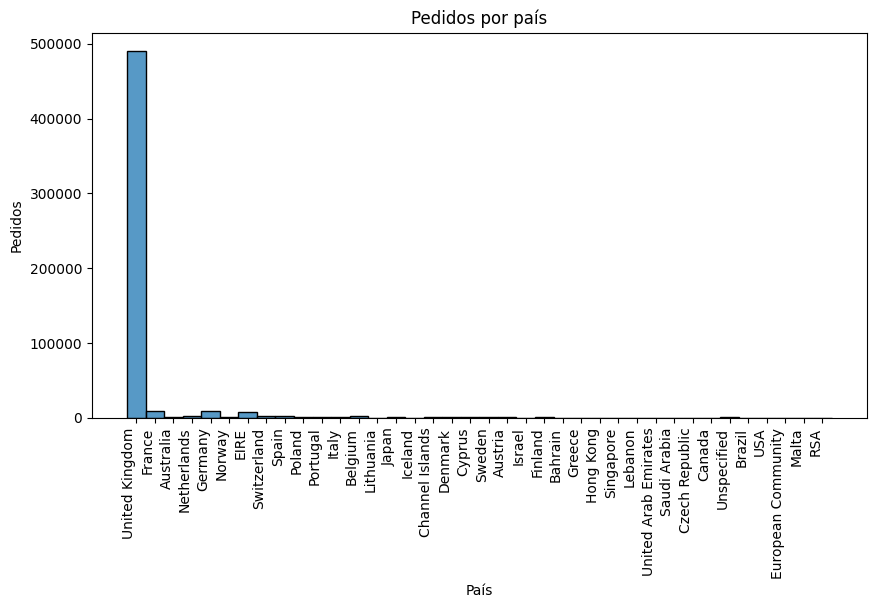

In [158]:
# Pedidos por país
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Country')
plt.title('Pedidos por país')
plt.ylabel('Pedidos')
plt.xlabel('País')
plt.xticks(rotation=90, horizontalalignment='right')
plt.show()
#logramos idenficas el pais con el mayot numero de ventas 

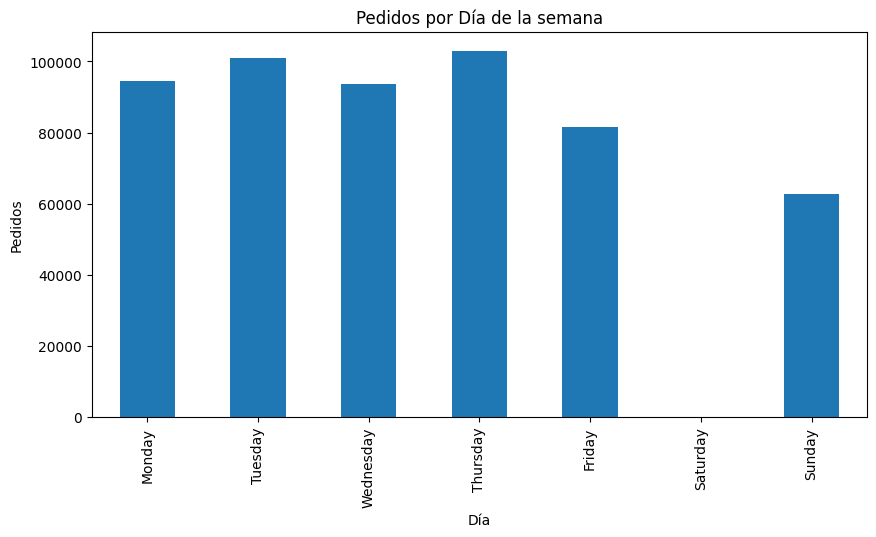

In [159]:
# Pedidos por día de la semana
# Cantidad de pedidos para cada 'Dia'
conteo = df['Dia'].value_counts()

# Orden de los días de la semana
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindexar el conteo utilizando el orden de los días
conteo = conteo.reindex(orden_dias)

conteo.plot(kind='bar', figsize=(10, 5))
plt.title('Pedidos por Día de la semana')
plt.xlabel('Día')
plt.ylabel('Pedidos')
plt.show()

# pordemos notar que los dias domingos son bajas las ventas y los dia sabado no esta registrando ventas puedo asumir que estos dia  trabajan.

In [160]:
df[df['Dia'] == 'Saturday']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Dia,MesN,Mes,Año


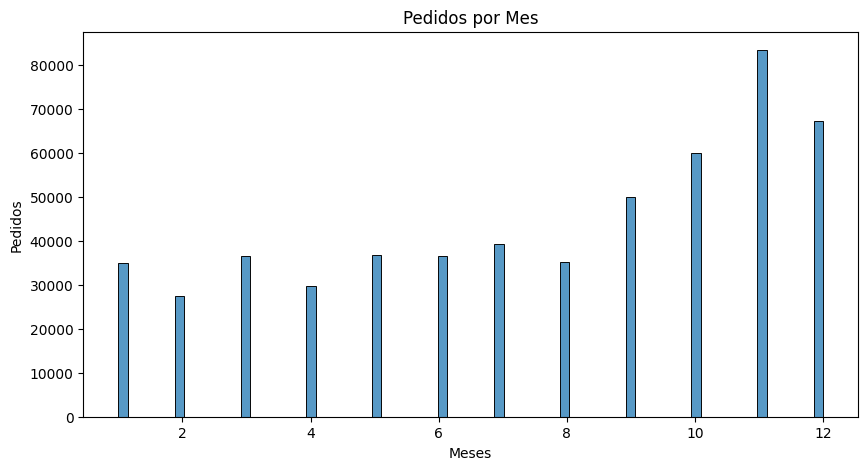

In [161]:
# Pedidos por mes
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='MesN')
plt.title('Pedidos por Mes')
plt.xlabel('Meses')
plt.ylabel('Pedidos')
plt.show()
#"Observamos un incremento desde septiembre, alcanzando un pico en noviembre, seguido de una caída hasta el mínimo en febrero.

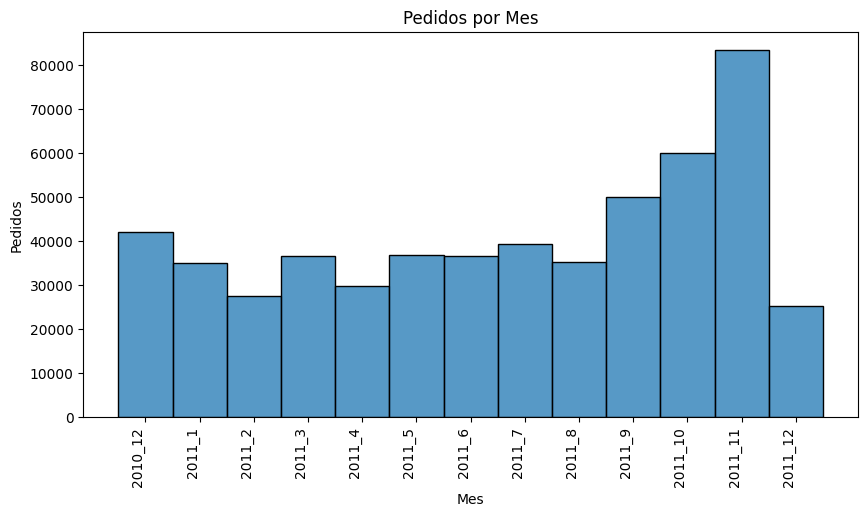

In [162]:
# Creamos una variable auxiliar
df['AñoMes'] = df['Año'].astype(str)+'_'+df['MesN'].astype(str)

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='AñoMes')
plt.title('Pedidos por Mes')
plt.xlabel('Mes')
plt.xticks(rotation=90, horizontalalignment='right')
plt.ylabel('Pedidos')
plt.show()

#Drop de la variable auxiliar
df = df.drop(['AñoMes'], axis=1)

In [163]:
#De las dos gráficas anteriores, puedo concluir que la cantidad de pedidos se mantiene relativamente constante durante el año hasta septiembre, 
# cuando comienzan a aumentar, alcanzando su pico en noviembre. Después de eso, disminuyen significativamente en diciembre.
#Sin embargo, los pedidos de diciembre de 2011 son mucho más bajos que el resto, y particularmente bajos en comparación con diciembre del año anterior.

In [164]:
# Total vendido pos pais.
df.groupby('Country')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)

,Country,Total
36,United Kingdom,8167128.184
24,Netherlands,284661.540
10,EIRE,262993.380
14,Germany,221509.470
13,France,197317.110
0,Australia,137009.770
33,Switzerland,56363.050
31,Spain,54756.030
3,Belgium,40910.960
32,Sweden,36585.410


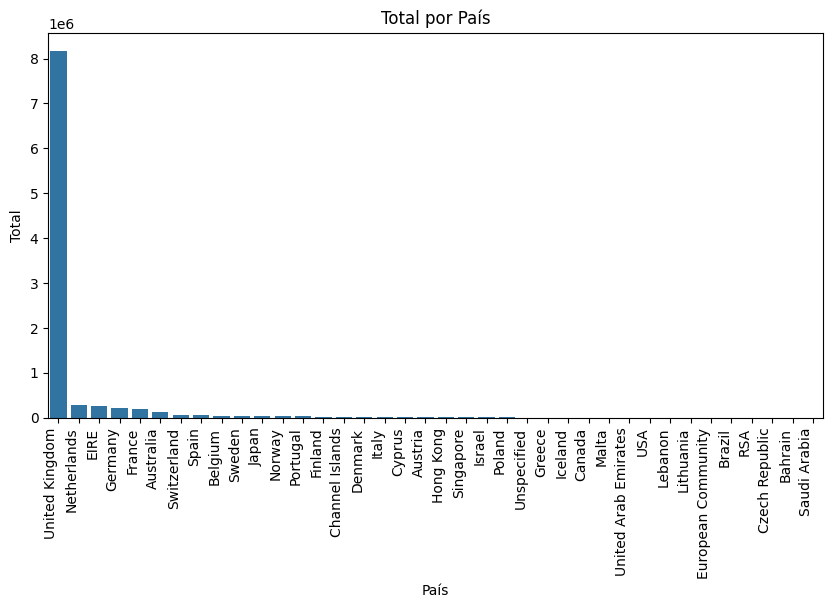

In [165]:
# Total por País
# Agrupar por país y sumar los totales, luego ordenarlos
total_por_pais = df.groupby('Country')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x='Country', y='Total', data=total_por_pais)

plt.xticks(rotation=90, horizontalalignment='right')
plt.title('Total por País')
plt.xlabel('País')
plt.ylabel('Total')
plt.show()

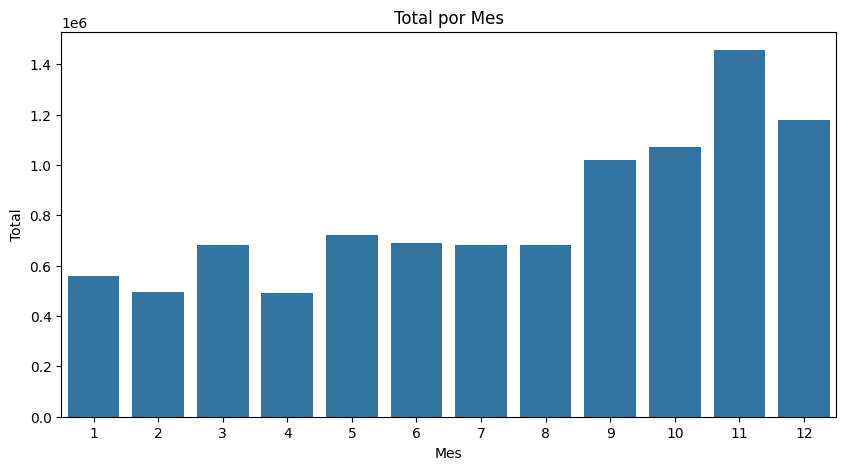

In [166]:
# Total por mes
total_por_mes = df.groupby('MesN')['Total'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='MesN', y='Total', data=total_por_mes)
plt.title('Total por Mes')
plt.xlabel('Mes')
plt.ylabel('Total')
plt.show()

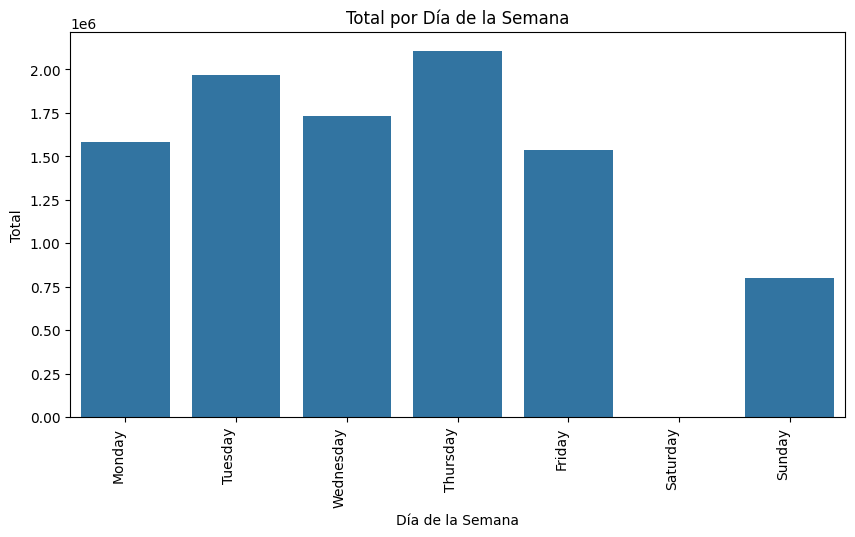

In [167]:
# Total por día de la semana
total_por_dia = df.groupby('Dia')['Total'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='Dia', y='Total', data=total_por_dia, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(rotation=90, horizontalalignment='right')
plt.title('Total por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Total')
plt.show()

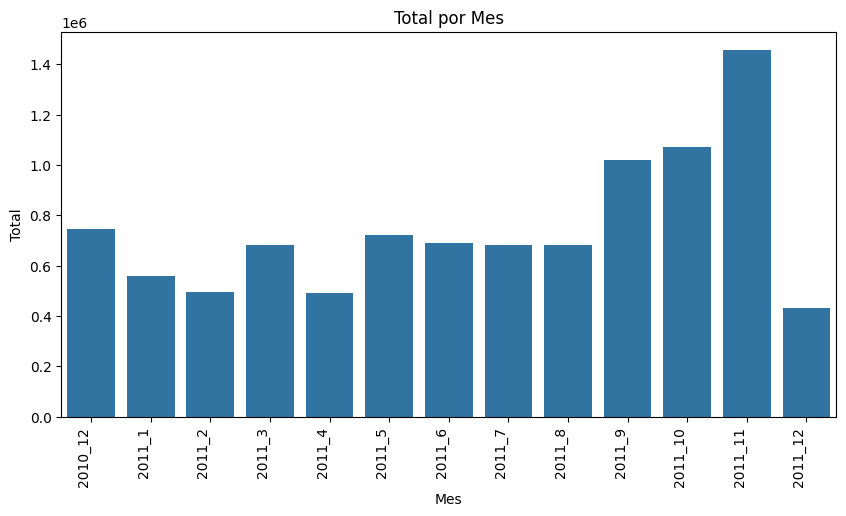

In [168]:
#Total por año
# Creamos una variable auxiliar
df['AñoMes'] = df['Año'].astype(str)+'_'+df['MesN'].astype(str)

total_por_mes = df.groupby('AñoMes')['Total'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=total_por_mes, 
            x='AñoMes', 
            y='Total', 
            errorbar=('ci', False), 
            order=['2010_12', '2011_1', '2011_2', '2011_3', '2011_4', '2011_5', '2011_6', '2011_7', '2011_8', '2011_9', '2011_10', '2011_11', '2011_12'])
plt.title('Total por Mes')
plt.xlabel('Mes')
plt.xticks(rotation=90, horizontalalignment='right')
plt.ylabel('Total')
plt.show()

#Drop de la variable auxiliar
df = df.drop(['AñoMes'], axis=1)

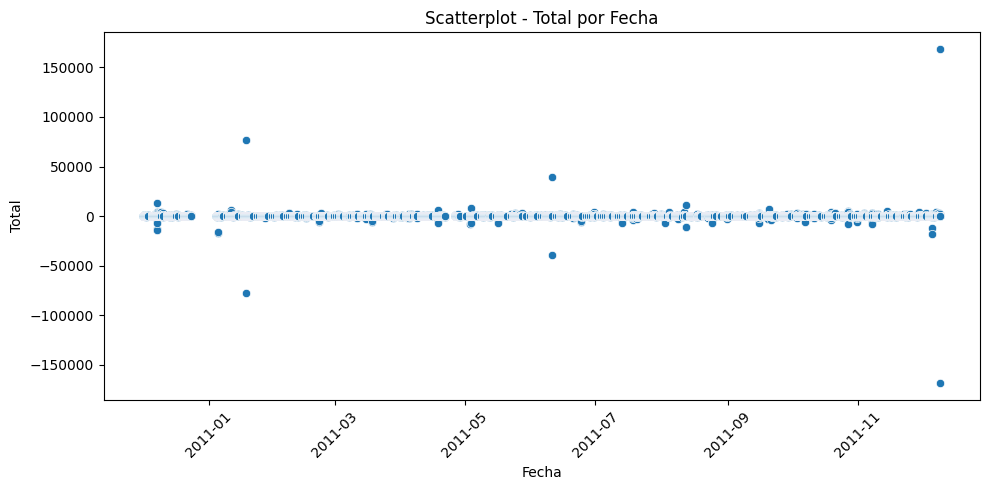

In [169]:
# Scatterplot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='InvoiceDate', y='Total')
plt.title('Scatterplot - Total por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [170]:
#Este gráfico sencillo nos revela varias cosas: los valores negativos que observamos anteriormente corresponden a devoluciones o anulaciones de operaciones. 
#Por ejemplo, si una persona compra 50.000 unidades y luego se arrepiente y las devuelve, se registra como -50.000



# Analysis of sales trends over time. Identify the month and days of the week with the most activit

In [171]:
# Explorar los productos mas vendidos y países, por cantidad vendida


In [172]:
df.groupby(['Country', 'Description'])['Quantity'].sum() 

Country      Description                  
Australia     DOLLY GIRL BEAKER               200
              I LOVE LONDON MINI BACKPACK       4
             10 COLOUR SPACEBOY PEN            48
             12 PENCIL SMALL TUBE WOODLAND    384
             12 PENCILS TALL TUBE POSY        252
                                             ... 
Unspecified  WRAP POPPIES  DESIGN              25
             WRAP SUKI AND FRIENDS             25
             WRAP VINTAGE PETALS  DESIGN       25
             WRAP WEDDING DAY                  25
             ZINC METAL HEART DECORATION        2
Name: Quantity, Length: 20176, dtype: int64

In [173]:
# Productos mas vendidos en cada país (q>1000):
top_paises = df.groupby(['Country', 'Description'])['Quantity'].sum().reset_index().sort_values(by=['Country', 'Quantity'], ascending=[True, False])

# Mostrar los productos más vendidos por país con más de 1000 unidades vendidas
for country, group in top_paises.groupby('Country'):
    print(f"País: {country}")
    filtered_group = group[group['Quantity'] > 1000]  # Filtrar productos con más de 1000 unidades vendidas
    if not filtered_group.empty:
        print(filtered_group.head())  # Muestra los productos más vendidos con más de 1000 unidades para cada país
    print("=" * 70) # sólo para la separación gráfica entre países

País: Australia
       Country                    Description  Quantity
287  Australia        MINI PAINT SET VINTAGE       2916
377  Australia             RABBIT NIGHT LIGHT      1884
386  Australia         RED  HARMONICA IN BOX       1704
410  Australia  RED TOADSTOOL LED NIGHT LIGHT      1344
124  Australia           DOLLY GIRL LUNCH BOX      1024
País: Austria
País: Bahrain
País: Belgium
País: Brazil
País: Canada
País: Channel Islands
País: Cyprus
País: Czech Republic
País: Denmark
País: EIRE
     Country                         Description  Quantity
4289    EIRE     PACK OF 72 RETROSPOT CAKE CASES      1728
3183    EIRE         60 TEATIME FAIRY CAKE CASES      1536
5005    EIRE                  VINTAGE SNAP CARDS      1492
3241    EIRE               ASSORTED INCENSE PACK      1440
4287    EIRE  PACK OF 60 PINK PAISLEY CAKE CASES      1296
País: European Community
País: Finland
País: France
     Country                    Description  Quantity
6635  France             RABBIT NIGHT L

# best-selling products and how they are distributed by country

In [174]:
# Productos mas vendidos por país (q>20000)
top_products = df.groupby(['Description', 'Country'])['Quantity'].sum().reset_index().sort_values(by=['Country', 'Quantity'], ascending=[True, False])

# Mostrar los productos más vendidos y su distribución por país
for description, group in top_products.groupby('Description'):
    filtered_group = group[group['Quantity'] > 20000]  # Filtrar productos con más de 20000 unidades vendidas
    if not filtered_group.empty:
        print(f"Producto: {description}")
        print(filtered_group)
        print("=" * 70)

Producto: ASSORTED COLOUR BIRD ORNAMENT
                        Description         Country  Quantity
1161  ASSORTED COLOUR BIRD ORNAMENT  United Kingdom     33580
Producto: ASSORTED COLOURS SILK FAN
                    Description         Country  Quantity
1203  ASSORTED COLOURS SILK FAN  United Kingdom     20322
Producto: BROCADE RING PURSE 
              Description         Country  Quantity
2581  BROCADE RING PURSE   United Kingdom     22765
Producto: JUMBO BAG RED RETROSPOT
                  Description         Country  Quantity
8574  JUMBO BAG RED RETROSPOT  United Kingdom     43064
Producto: PACK OF 12 LONDON TISSUES 
                      Description         Country  Quantity
10830  PACK OF 12 LONDON TISSUES   United Kingdom     25291
Producto: PACK OF 60 PINK PAISLEY CAKE CASES
                              Description         Country  Quantity
11160  PACK OF 60 PINK PAISLEY CAKE CASES  United Kingdom     20254
Producto: PACK OF 72 RETROSPOT CAKE CASES
                        

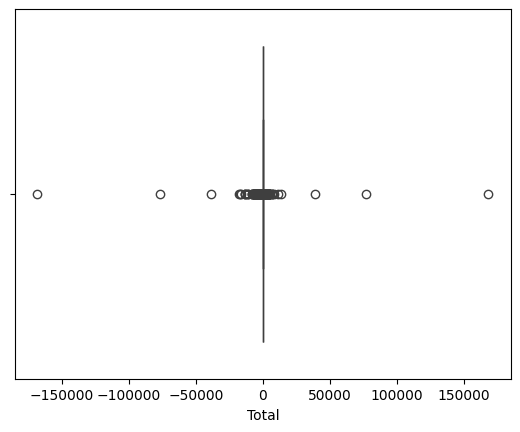

In [175]:
#anormalidades y su impacto en el análisis
sns.boxplot(x=df['Total'])
plt.show()

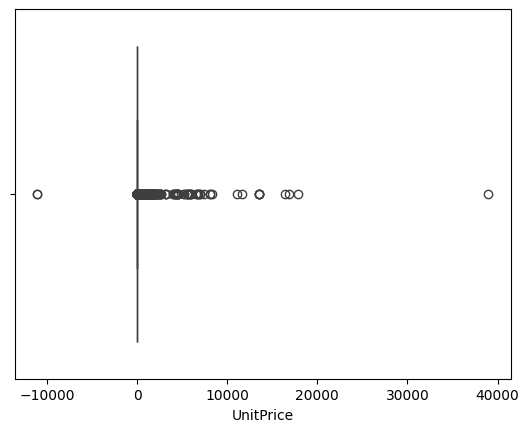

In [176]:
#revisar cada uno de estos ajustes.
#Vamos por parte: dado que (Total = p x q), veamos los outliers por precio y cantidad
#PRECIO
sns.boxplot(x=df['UnitPrice'])
plt.show()

In [177]:
# Percentiles e Intervalo Interquartil
per25  = df['UnitPrice'].quantile(0.25)
per75  = df['UnitPrice'].quantile(0.75)
iqr    = per75 - per25
limsup = per75 + 1.5 * iqr
liminf = per25 - 1.5 * iqr
print('límite inferior:' + liminf.astype(str))

#revisamos por que hay precios menores que 0

límite inferior:-3.0700000000000003


In [178]:
df[df['UnitPrice'] <= 0].sort_values(by='UnitPrice', ascending=True).head(20)
# encontramos Adjust bad deb , puede que sea un ajuste de inventario doble

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Dia,MesN,Mes,Año
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,1,United Kingdom,-11062.06,Friday,8,August,2011
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,1,United Kingdom,-11062.06,Friday,8,August,2011
538919,581422,23169,smashed,-235,2011-12-08 15:24:00,0.00,1,United Kingdom,-0.00,Thursday,12,December,2011
538554,581408,85175,None,20,2011-12-08 14:06:00,0.00,1,United Kingdom,0.00,Thursday,12,December,2011
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.00,1,United Kingdom,0.00,Thursday,12,December,2011
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.00,1,United Kingdom,0.00,Thursday,12,December,2011
536981,581234,72817,None,27,2011-12-08 10:33:00,0.00,1,United Kingdom,0.00,Thursday,12,December,2011
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.00,1,United Kingdom,-0.00,Thursday,12,December,2011
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.00,1,United Kingdom,-0.00,Wednesday,12,December,2011
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.00,1,United Kingdom,-0.00,Wednesday,12,December,2011


In [179]:
df[df['Description'] == 'Adjust bad debt']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Dia,MesN,Mes,Año
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,1,United Kingdom,11062.06,Friday,8,August,2011
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,1,United Kingdom,-11062.06,Friday,8,August,2011
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,1,United Kingdom,-11062.06,Friday,8,August,2011


In [180]:
# como Adjust bad debt correspode a ajustes dobles eliminanos estos archivos 
df = df.drop(df[df['Description'] == 'Adjust bad debt'].index)

In [181]:
df[df['UnitPrice'] <= 0][['Description', 'UnitPrice']].value_counts()
# en contamos unos posibles  castigos de inventario .

Description                        UnitPrice
check                              0.0          159
?                                  0.0           47
damages                            0.0           45
damaged                            0.0           43
found                              0.0           25
                                               ... 
Damages/samples                    0.0            1
Display                            0.0            1
AIRLINE BAG VINTAGE JET SET WHITE  0.0            1
Dotcom                             0.0            1
rusty thrown away                  0.0            1
Name: count, Length: 376, dtype: int64

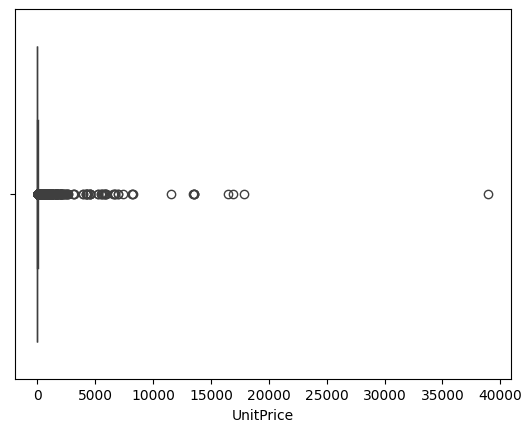

In [182]:
# Rehacer Boxplot
sns.boxplot(x=df['UnitPrice'])
plt.show()

In [183]:
#ahora revisemos el límite superior 
print('límite superior: '+ limsup.astype(str))

límite superior: 8.45


In [184]:
df[df['UnitPrice'] >= limsup].sort_values(by='UnitPrice', ascending=False).head(10)
#Al parecer, buena parte de los precios superiores son reversas (ingresos?) de Amazon Fees, Gastos de envío y "Manual". Este último punto, siendo el mas "caro

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Dia,MesN,Mes,Año
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098,United Kingdom,-38970.00,Friday,6,June,2011
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,1,United Kingdom,-17836.46,Monday,12,December,2011
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,1,United Kingdom,-16888.02,Wednesday,1,January,2011
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,1,United Kingdom,-16453.71,Wednesday,1,January,2011
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,1,United Kingdom,-13541.33,Tuesday,12,December,2010
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,1,United Kingdom,-13541.33,Tuesday,12,December,2010
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,1,United Kingdom,13541.33,Tuesday,12,December,2010
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,1,United Kingdom,-13474.79,Tuesday,12,December,2010
524601,C580604,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:35:00,11586.50,1,United Kingdom,-11586.50,Monday,12,December,2011
446533,C574902,AMAZONFEE,AMAZON FEE,-1,2011-11-07 15:21:00,8286.22,1,United Kingdom,-8286.22,Monday,11,November,2011


In [185]:
print(df['Description'].unique())

['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']


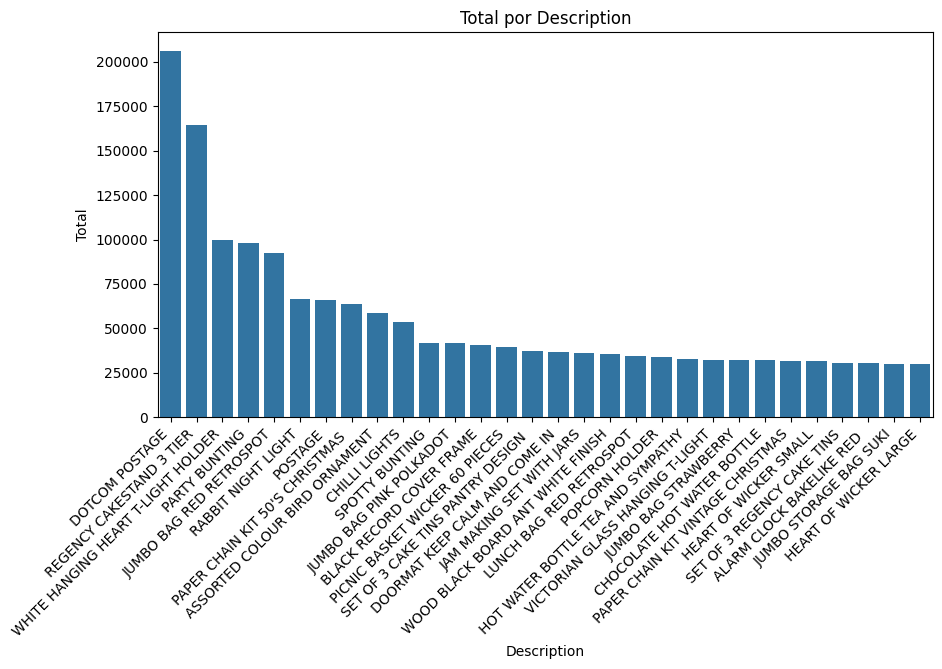

In [186]:
#buscamos informacion mas detallada 
# Agrupar por Descripción y sumar los totales, luego ordenarlos
total_por_pais = df.groupby('Description')['Total'].sum().reset_index().sort_values(by='Total', ascending=False).head(30)

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x='Description', y='Total', data=total_por_pais)

plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Total por Description')
plt.xlabel('Description')
plt.ylabel('Total')
plt.show()

In [187]:
# Este dataset contiene transacciones de una tienda online,
# incluyendo algunos costos adicionales para el cliente, como el precio de despacho, tanto local como internacional.
# Independientemente de las devoluciones, los costos de ‘DOTCOM POSTAGE’ son los más altos. 
# Vamos a investigar de qué se trata y si representan eventos anómalos. También es interesante analizar ‘POSTAGE’

In [188]:
df[df['Description'] == 'DOTCOM POSTAGE'].sort_values(by=['Total'], ascending=False)
#muchos registros, como habría de esperarse de un distribuidor por Internet

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Dia,MesN,Mes,Año
297723,562955,DOT,DOTCOM POSTAGE,1,2011-08-11 10:14:00,4505.17,1,United Kingdom,4505.17,Thursday,8,August,2011
493020,578149,DOT,DOTCOM POSTAGE,1,2011-11-23 11:11:00,2275.54,1,United Kingdom,2275.54,Wednesday,11,November,2011
524892,580610,DOT,DOTCOM POSTAGE,1,2011-12-05 11:48:00,2196.67,1,United Kingdom,2196.67,Monday,12,December,2011
525134,580612,DOT,DOTCOM POSTAGE,1,2011-12-05 11:58:00,2114.00,1,United Kingdom,2114.00,Monday,12,December,2011
502058,578833,DOT,DOTCOM POSTAGE,1,2011-11-25 15:23:00,2028.25,1,United Kingdom,2028.25,Friday,11,November,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161024,550470,DOT,DOTCOM POSTAGE,1,2011-04-18 13:49:00,2.29,1,United Kingdom,2.29,Monday,4,April,2011
272188,560755,DOT,DOTCOM POSTAGE,1,2011-07-20 16:00:00,0.35,1,United Kingdom,0.35,Wednesday,7,July,2011
178281,552230,DOT,DOTCOM POSTAGE,1,2011-05-06 15:43:00,0.00,1,United Kingdom,0.00,Friday,5,May,2011
521436,580366,DOT,DOTCOM POSTAGE,1,2011-12-02 16:38:00,0.00,1,United Kingdom,0.00,Friday,12,December,2011


In [189]:
df[df['UnitPrice'] >= limsup][['Description', 'UnitPrice']].value_counts()
#.sort_values(by='UnitPrice', ascending=False)

Description                          UnitPrice
REGENCY CAKESTAND 3 TIER             12.75        1540
POSTAGE                              18.00         720
IVORY KITCHEN SCALES                 8.50          597
RED RETROSPOT CAKE STAND             10.95         444
CREAM SWEETHEART MINI CHEST          12.75         442
                                                  ... 
Discount                             1867.86         1
Dotcomgiftshop Gift Voucher £100.00  83.33           1
Dotcomgiftshop Gift Voucher £20.00   17.02           1
Dotcomgiftshop Gift Voucher £30.00   25.53           1
Dotcomgiftshop Gift Voucher £40.00   34.04           1
Name: count, Length: 2802, dtype: int64

In [190]:
print('media: ', df['UnitPrice'].quantile(0.50).astype(str), '\n'
      'percentil75: ', per75.astype(str))
#resulta que aunque la mediana del precio es 2.1, y el percentil 75 es 4.13, aún hay muchos artículos muy caros en la tienda

media:  2.08 
percentil75:  4.13


In [191]:
# 20 mayores precios
df[df['UnitPrice'] >= 8.45][['Description', 'UnitPrice', 'Quantity']].sort_values(by='UnitPrice', ascending=False).head(15)
#Buena parte de los 20 mayores precios son fees de Amazon y costos de envío, mas "Manual"

,Description,UnitPrice,Quantity
222681,Manual,38970.00,-1
524602,AMAZON FEE,17836.46,-1
43702,AMAZON FEE,16888.02,-1
43703,AMAZON FEE,16453.71,-1
15016,AMAZON FEE,13541.33,-1
16356,AMAZON FEE,13541.33,-1
15017,AMAZON FEE,13541.33,1
16232,AMAZON FEE,13474.79,-1
524601,AMAZON FEE,11586.50,-1
446533,AMAZON FEE,8286.22,-1


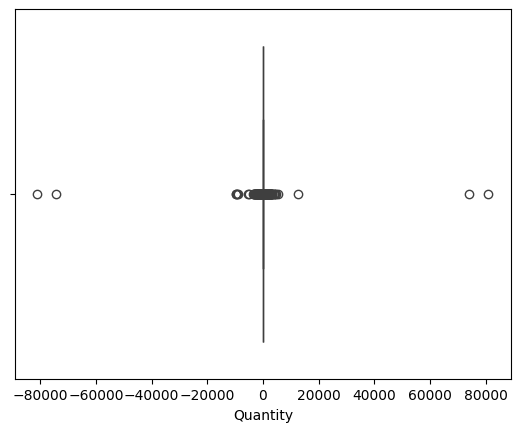

In [192]:
#Cantidad
# Boxplot
sns.boxplot(x=df['Quantity'])
plt.show()

In [194]:
# Percentiles e Intervalo Interquartil
per25  = df['Quantity'].quantile(0.25)
per75  = df['Quantity'].quantile(0.75)
iqr    = per75 - per25
limsup = per75 + 1.5 * iqr
liminf = per25 - 1.5 * iqr
print('límite inferior:' + liminf.astype(str), '\n'
     'límite superior: ' + limsup.astype(str))

límite inferior:-12.5 
límite superior: 23.5


In [197]:
df[df['Quantity'] <= liminf].sort_values(by='Quantity', ascending=True).head(10)
#Las cantidades negativas son devoluciones y ajustes de inventario.
#Tocaría revisar cada una de las devoluciones en buscar de inconsistencias con el inventario.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Dia,MesN,Mes,Año
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,-168469.6,Friday,12,December,2011
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.6,Tuesday,1,January,2011
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,1,United Kingdom,-0.0,Tuesday,6,June,2011
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,1,United Kingdom,-0.0,Tuesday,6,June,2011
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom,-280.8,Thursday,12,December,2010
225528,556687,23003,Printing smudges/thrown away,-9058,2011-06-14 10:36:00,0.00,1,United Kingdom,-0.0,Tuesday,6,June,2011
115818,546152,72140F,throw away,-5368,2011-03-09 17:25:00,0.00,1,United Kingdom,-0.0,Wednesday,3,March,2011
431381,573596,79323W,"Unsaleable, destroyed.",-4830,2011-10-31 15:17:00,0.00,1,United Kingdom,-0.0,Monday,10,October,2011
341601,566768,16045,None,-3667,2011-09-14 17:53:00,0.00,1,United Kingdom,-0.0,Wednesday,9,September,2011
323458,565304,16259,None,-3167,2011-09-02 12:18:00,0.00,1,United Kingdom,-0.0,Friday,9,September,2011


In [198]:
df[df['Quantity'] <= 0][['Description', 'Quantity']].value_counts()
#La descripción es inconsistente, por lo que tocaría revisar por código de producto para chequear las inconsistencias con inventario.


Description                   Quantity
Manual                        -1          197
POSTAGE                       -1          112
REGENCY CAKESTAND 3 TIER      -1           91
Discount                      -1           72
SAMPLES                       -1           60
                                         ... 
wrongly coded-23343           -800          1
wrongly marked carton 22804   -256          1
wrongly marked. 23343 in box  -3100         1
wrongly sold as sets          -600          1
wet pallet                    -504          1
Name: count, Length: 5105, dtype: int64

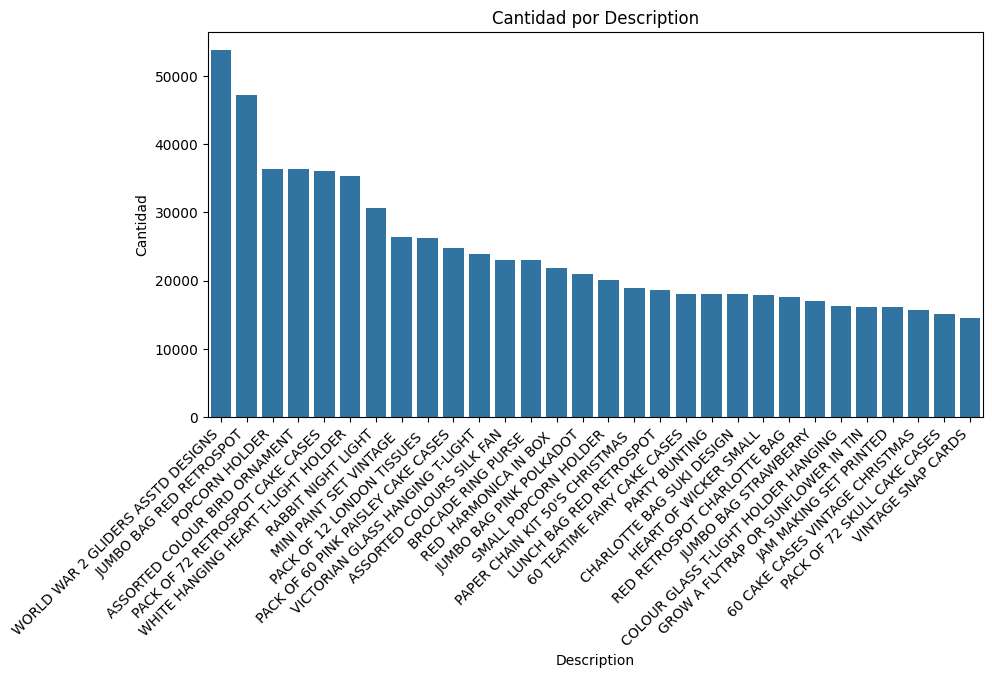

In [200]:
# Agrupar por Cantidad y sumar los totales, luego ordenarlos
total_por_pais = df.groupby('Description')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(30)

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x='Description', y='Quantity', data=total_por_pais)

plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Cantidad por Description')
plt.xlabel('Description')
plt.ylabel('Cantidad')
plt.show()


#no siempre artículos mas vendidos son los que generan mayores ingresos, pero en este caso hay algunos productos "estrella"